In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
seen_df = pd.read_csv('data/0a_labelled_documents.csv')
unseen_df = pd.read_csv('data/0b_unlabelled_documents.csv')

df = (pd.concat([seen_df,unseen_df])
      .sort_values('id')
      .sample(frac=1, random_state=1)
      .reset_index(drop=True)
     )

seen_index = df[df['seen']==1].index
unseen_index = df[df['seen']==0].index
print(df.shape)

# Get a list of predictions for the unseen documents
y_pred = np.load('data/predictions.npy')
df['prediction'] = df['relevant']
df.loc[unseen_index,"prediction"] = y_pred[:,1]

# Get a list of multilabel predictions for the unseen documents
pred_rel_index = df[(df['prediction']>=0.5) & (df['prediction']<1)].index
y_pred = np.load('data/m_predictions.npy')
df = df.rename(columns={"1 - Impact": "1 - Impacts"})
classes = ["1 - Mitigation","1 - Adaptation", "1 - Impacts"]
for i, c in enumerate(classes):
    df[f'{c} - prediction'] = df[c]
    df.loc[pred_rel_index,f'{c} - prediction'] = y_pred[:,i]

df = df[df['prediction']>0.5]
print(df.shape)

df.head()

(699525, 14)
(22054, 18)


,id,content,title,PY,wosarticle__de,wosarticle__wc,relevant,seen,1 - Adaptation,1 - Impacts,1 - Mitigation,wosarticle__dt,tslug,UT__UT,prediction,1 - Mitigation - prediction,1 - Adaptation - prediction,1 - Impacts - prediction
52,4963912,Objective To explore the association between n...,Exploration of the association between meteoro...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,explorationoftheassociationbetweenmeteorologic...,2-s2.0-85123003389,0.790797,0.010609,0.006835,0.980508
69,4729030,Background. Acute gastroenteritis is a cause o...,ACUTE GASTROENTERITIS IN 3 COMMUNITY-BASED NUR...,1995.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,acutegastroenteritisin3communitybasednursinghomes,WOS:A1995RY60500014,0.714243,0.024695,0.073035,0.910536
80,4762134,Background: Despite declining age-adjusted str...,Mortality and Predictors of Death 1 Month and ...,2010.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,mortalityandpredictorsofdeath1monthand3yearsaf...,WOS:000273552100004,0.554120,0.029360,0.061142,0.938161
99,678134,Weather factors are widely studied for their e...,Statistical Modeling Reveals the Effect of Abs...,2014.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,statisticalmodelingrevealstheeffectofabsoluteh...,WOS:000337735100017,0.957414,0.004876,0.007306,0.992824
113,304387,The aim of this study was to determine the hea...,A systematic review of the health effects of p...,2015.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Review,asystematicreviewofthehealtheffectsofprenatale...,WOS:000364521200008,0.588936,0.003917,0.044029,0.944127


In [3]:
y_pred.sum(axis=0)

array([ 2894.04732378,  2865.28194413, 17922.81433607])

In [4]:
places = pd.read_csv('data/clean_place_df.csv')
places.head()

,word,spans,country_predicted,country_conf,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,continent
0,Shanghai,"[{'start': 162, 'end': 170}]",CHN,0.963741,Shanghai,31.22222,121.45806,CHN,1796236.0,Shanghai,P,PPLA,4963912,Asia
1,Thailand,"[{'start': 57, 'end': 65}]",THA,0.948191,NaN,15.50000,101.00000,THA,1605651.0,Kingdom of Thailand,A,PCLI,4695222,Asia
2,Bangkok,"[{'start': 302, 'end': 309}]",THA,0.961249,Bangkok,13.75398,100.50144,THA,1609350.0,Bangkok,P,PPLC,4695222,Asia
3,Israel,"[{'start': 285, 'end': 291}]",ISR,0.948191,NaN,31.50000,34.75000,ISR,294640.0,State of Israel,A,PCLI,4762134,Asia
4,Singapore,"[{'start': 74, 'end': 83}]",SGP,0.946707,NaN,1.36667,103.80000,SGP,1880251.0,Republic of Singapore,A,PCLI,678134,Asia


<BarContainer object of 32 artists>

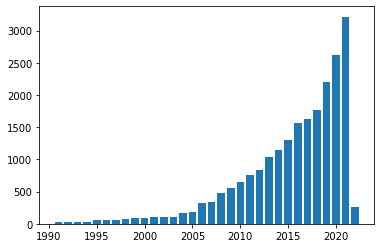

In [5]:
fig, ax = plt.subplots()

counts = df.query('PY>1990').groupby('PY')['id'].count()
ax.bar(counts.index, counts)

In [6]:
# Merge places with df

merged_df = df.merge(places,left_on="id",right_on="doc_id")
    
print(merged_df.shape)
merged_df.head()

(37417, 32)


,id,content,title,PY,wosarticle__de,wosarticle__wc,relevant,seen,1 - Adaptation,1 - Impacts,...,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,continent
0,4963912,Objective To explore the association between n...,Exploration of the association between meteoro...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,...,Shanghai,31.22222,121.45806,CHN,1796236.0,Shanghai,P,PPLA,4963912,Asia
1,4762134,Background: Despite declining age-adjusted str...,Mortality and Predictors of Death 1 Month and ...,2010.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,31.50000,34.75000,ISR,294640.0,State of Israel,A,PCLI,4762134,Asia
2,678134,Weather factors are widely studied for their e...,Statistical Modeling Reveals the Effect of Abs...,2014.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,1.36667,103.80000,SGP,1880251.0,Republic of Singapore,A,PCLI,678134,Asia
3,1622376,Background Malaria is an important cause of il...,Mosquito larval source management for controll...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,7.75000,80.75000,LKA,1227603.0,Democratic Socialist Republic of Sri Lanka,A,PCLI,1622376,Asia
4,1622376,Background Malaria is an important cause of il...,Mosquito larval source management for controll...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,22.00000,79.00000,IND,1269750.0,Republic of India,A,PCLI,1622376,Asia


In [7]:
eea_countries = [
    "AUT",
    "BEL",
    "BGR",
    "HRV",
    "CYP",
    "CZE",
    "DNK",
    "EST",
    "FIN",
    "FRA",
    "DEU",
    "GRC",
    "HUN",
    "ISL",
    "IRL",
    "ITA",
    "LVA",
    "LIE",
    "LTU",
    "LUX",
    "MLT",
    "NLD",
    "NOR",
    "POL",
    "PRT",
    "ROU",
    "SVK",
    "SVN",
    "ESP",
    "SWE",
    "CHE",
    "TUR",
    "ALB",
    "BIH",
    "XKX",
    "MNE",
    "MKD",
    "SRB",
    "GBR"
]

In [8]:
# Europe
edf = merged_df[merged_df['country_code3'].isin(eea_countries)]
print(edf.shape)
print(len(edf.doc_id.unique()))
edf.head()

(5290, 32)
3082


,id,content,title,PY,wosarticle__de,wosarticle__wc,relevant,seen,1 - Adaptation,1 - Impacts,...,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,continent
6,1622376,Background Malaria is an important cause of il...,Mosquito larval source management for controll...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,39.00000,22.00000,GRC,390903.0,Hellenic Republic,A,PCLI,1622376,Europe
14,4843745,"The health, economic, and social impact of COV...",Effects of air pollution and climatology on CO...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,40.00000,-4.00000,ESP,2510769.0,Kingdom of Spain,A,PCLI,4843745,Europe
42,495161,The average summer temperatures as well as the...,Heat wave hazard classification and risk asses...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,Attica,37.98376,23.72784,GRC,264371.0,Athens,P,PPLC,495161,Europe
43,495161,The average summer temperatures as well as the...,Heat wave hazard classification and risk asses...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,39.00000,22.00000,GRC,390903.0,Hellenic Republic,A,PCLI,495161,Europe
62,1299056,Background Anthropogenic greenhouse gas emissi...,Heat-related mortality trends under recent cli...,2018.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,40.00000,-4.00000,ESP,2510769.0,Kingdom of Spain,A,PCLI,1299056,Europe


,n,n-5,CAGR_5,CAGR_1990,CAGR_1995,CAGR_2000,CAGR_2005
PY,,,,,,,
2018.0,223,162.0,0.066002,0.350397,0.171051,0.129271,0.097188
2019.0,251,174.0,0.076031,0.337515,0.168611,0.129075,0.098663
2020.0,337,176.0,0.138737,0.337770,0.176750,0.138897,0.109734
2021.0,367,201.0,0.127961,0.324729,0.172417,0.136471,0.108739
2022.0,33,173.0,-0.282051,0.172258,0.043253,0.012700,-0.010902


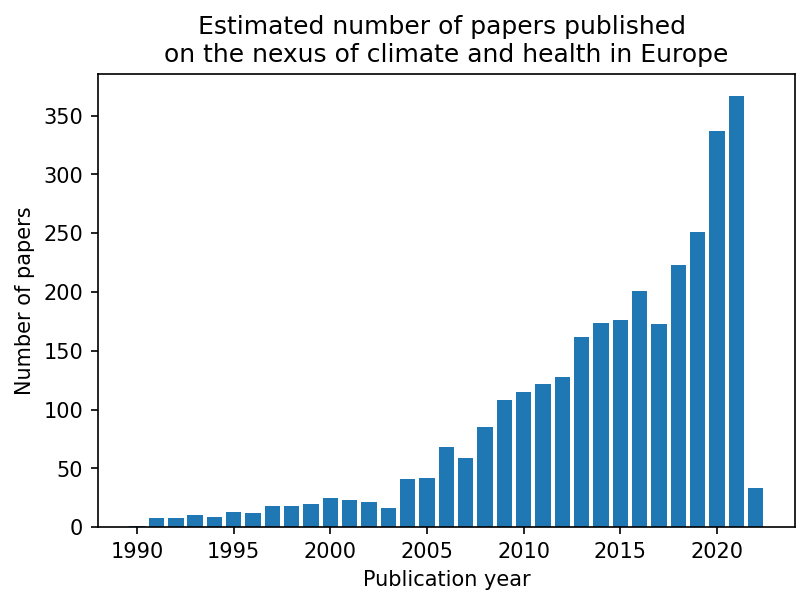

In [9]:
counts = df[df['id'].isin(edf['doc_id'])].groupby('PY')['id'].count()

fig, ax = plt.subplots(dpi=150)
ax.bar(counts.index, counts)

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')

def CAGR(first, last, periods):
    if periods > 0:
        return (last/first)**(1/periods)-1

counts = counts.to_frame("n")
counts['n-5'] = counts.shift(5)
counts['CAGR_5'] = counts.apply(lambda x: CAGR(x['n-5'],x['n'],5),axis=1)

for base_year in [1990,1995,2000,2005]:
    counts[f'CAGR_{base_year}'] = counts.apply(lambda x: CAGR(counts[counts.index==base_year]['n'].values[0],x['n'],x.name-2000), axis=1)
counts.tail()

In [10]:
base_year = 2000
counts[counts.index==base_year]['n'].values[0]

25

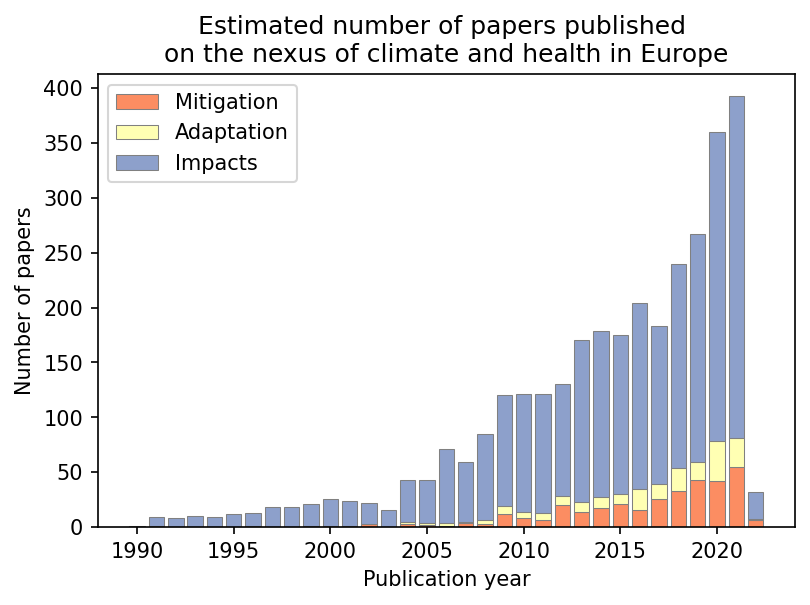

In [11]:
fig, ax = plt.subplots(dpi=150)
colors = ['#fc8d62','#ffffb3','#8da0cb']
all_counts = None
for i, c in enumerate(classes):
    counts = df[
        (df['id'].isin(edf['doc_id'])) & 
        (df[f'{c} - prediction']>0.5)
    ].groupby('PY')['id'].count().to_frame(c)
    
    if all_counts is not None:
        all_counts = all_counts.merge(counts, left_index=True, right_index=True, how="outer").fillna(0)
        bottom = all_counts[[x for x in all_counts.columns if x!=c]].sum(axis=1)
    else:
        all_counts = counts
        bottom = None
    
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    

    ax.set_ylabel('Number of papers')
    ax.set_xlabel('Publication year')

    ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')
    
ax.legend()

In [12]:
all_counts

,1 - Mitigation,1 - Adaptation,1 - Impacts
PY,,,
1990.0,0.0,0.0,1
1991.0,0.0,1.0,8
1992.0,0.0,0.0,8
1993.0,0.0,0.0,10
1994.0,0.0,0.0,9
1995.0,0.0,0.0,12
1996.0,1.0,0.0,12
1997.0,0.0,0.0,18
1998.0,0.0,0.0,18


/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


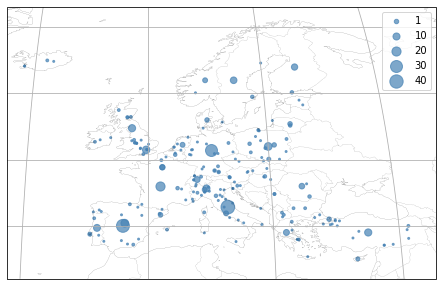

In [13]:
import cartopy
fig = plt.figure(figsize=(8,5))

p = ccrs.LambertConformal(
    central_longitude=0, central_latitude=52, false_easting=0.0, false_northing=0.0, 
    secant_latitudes=None, standard_parallels=(33, 45), globe=None, cutoff=-30
)

p = ccrs.EckertIII()


place_counts = edf[edf['PY']==2021].groupby(['lat', 'lon'])['doc_id'].count().sort_values().reset_index()
place_counts.head()

ax = plt.axes(projection=p)

ax.set_extent([-22,45,32,70])
ax.gridlines()

ax.add_feature(cartopy.feature.BORDERS, lw=0.2, linestyle=':')

M=5

bins = np.linspace(place_counts.doc_id.min(), place_counts.doc_id.max(), M)
#bins = np.array([1,50,100,150,200])
bins = np.array([1,10,20,30,40])
grouped = place_counts.groupby(np.digitize(place_counts.doc_id, bins))

for i, (name, group) in enumerate(grouped):
    
    ax.scatter(
        group['lon'], group['lat'], 
        transform=ccrs.PlateCarree(), 
        s=group['doc_id']*4,
        label=bins[i],
        alpha=0.7,
        color="steelblue"
    )
    
ax.legend(loc="upper right")


ax.coastlines(lw=0.1)

,1 - Impacts
PY,
2018.0,186
2019.0,208
2020.0,282
2021.0,312
2022.0,25


/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


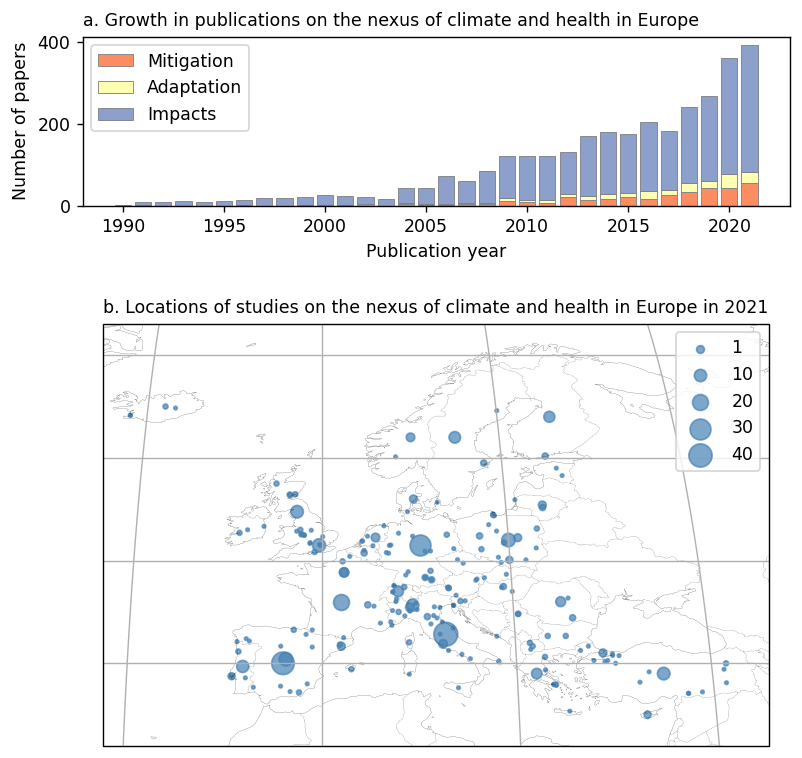

In [14]:
import matplotlib.gridspec as gridspec

tfs = 10

fig = plt.figure(dpi=125,figsize=(7.3,6.3))
gs = gridspec.GridSpec(2, 1, height_ratios=[.4, 1,], bottom=.05, top=.95, wspace=.2, hspace=.4)

ax = plt.subplot(gs[0,0])

all_counts = all_counts[all_counts.index<2022]

bottom = 0
for i, c in enumerate(classes):
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    bottom += all_counts[c]   

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')  
ax.legend()

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('a. Growth in publications on the nexus of climate and health in Europe', loc="left", fontsize=tfs)

ax = plt.subplot(gs[1,0],projection=p)
ax.set_extent([-22,45,32,70])
ax.gridlines()
ax.add_feature(cartopy.feature.BORDERS, lw=0.2, linestyle=':')
ax.coastlines(lw=0.1)

for i, (name, group) in enumerate(grouped):
    
    ax.scatter(
        group['lon'], group['lat'], 
        transform=ccrs.PlateCarree(), 
        s=group['doc_id']*4,
        label=bins[i],
        alpha=0.7,
        color="steelblue"
    )
    
ax.legend(loc="upper right")

ax.set_title('b. Locations of studies on the nexus of climate and health in Europe in 2021', loc="left", fontsize=tfs)


counts.tail()

In [17]:
shares = all_counts.copy()

for c in classes:
    shares[c] = shares[c] / all_counts.sum(axis=1)
    
shares.to_csv('data/shares.csv')
shares

,1 - Mitigation,1 - Adaptation,1 - Impacts
PY,,,
1990.0,0.000000,0.000000,1.000000
1991.0,0.000000,0.111111,0.888889
1992.0,0.000000,0.000000,1.000000
1993.0,0.000000,0.000000,1.000000
1994.0,0.000000,0.000000,1.000000
1995.0,0.000000,0.000000,1.000000
1996.0,0.076923,0.000000,0.923077
1997.0,0.000000,0.000000,1.000000
1998.0,0.000000,0.000000,1.000000


In [18]:
growth = []
for name, group in edf.groupby('country_code3'):
    p21 = len(group[group['PY']==2021].doc_id.unique())
    p20 = len(group[group['PY']==2020].doc_id.unique())
    p5y = len(group[group['PY'].isin(np.arange(2014,2021))]) / 5
    growth.append({"country_code3": name, "p21":p21, "p20":p20, "p5y": p5y})
    
growth_df = pd.DataFrame.from_dict(growth)
growth_df['growth'] = growth_df['p21'] - growth_df['p5y']
growth_df['pgrowth'] = growth_df['growth'] / growth_df['p5y']
growth_df.sort_values('p21').tail()

,country_code3,p21,p20,p5y,growth,pgrowth
13,FRA,40,31,39.0,1.0,0.025641
14,GBR,44,42,49.0,-5.0,-0.102041
8,DEU,47,44,48.8,-1.8,-0.036885
10,ESP,65,70,78.2,-13.2,-0.168798
20,ITA,66,57,64.8,1.2,0.018519


In [19]:
growth_df.sort_values('pgrowth').tail()

,country_code3,p21,p20,p5y,growth,pgrowth
36,TUR,21,14,18.4,2.6,0.141304
21,LTU,5,4,4.0,1.0,0.250000
9,DNK,6,6,4.6,1.4,0.304348
18,IRL,4,3,2.8,1.2,0.428571
24,MKD,4,1,2.6,1.4,0.538462


## Institutions

In [50]:
dais = pd.read_csv('data/institutional_locations.csv')
dais.head()

,id,doc_id,surname,initials,AU,AF,institution,position,country,alpha_3,name,alpha_2
0,1217824,562,NaN,NaN,"Pinkerton, KE","Pinkerton, Kent E.","Univ Calif Davis, Ctr Hlth & Environm, Davis, ...",4,USA,USA,United States,US
1,1217742,562,NaN,NaN,"Thurston, GD","Thurston, George D.","NYU, Dept Environm Med, Sch Med, New York, NY ...",2,USA,USA,United States,US
2,1217830,562,NaN,NaN,"Pinkerton, KE","Pinkerton, Kent E.","Univ Calif Davis, John Muir Inst Environm, Dav...",4,USA,USA,United States,US
3,1217730,562,NaN,NaN,"Rice, MB","Rice, Mary B.","Harvard Univ, Beth Israel Deaconess Med Ctr, S...",1,USA,USA,United States,US
4,1217695,562,NaN,NaN,"Rice, MB","Rice, Mary B.","Massachusetts Gen Hosp, Pulm & Crit Care Unit,...",1,USA,USA,United States,US


PY
1995.0      1
1996.0      1
1997.0      1
1998.0      4
1999.0      2
2000.0      1
2001.0      3
2002.0      5
2003.0      6
2004.0      4
2005.0      2
2006.0      9
2007.0     29
2008.0    137
2009.0    175
2010.0    193
2011.0    235
2012.0    259
2013.0    332
2014.0    344
2015.0    373
2016.0    439
2017.0    445
2018.0    489
2019.0    569
2020.0    645
2021.0    819
2022.0     67
Name: id, dtype: int64


,n,n-5,CAGR_5,CAGR_1995,CAGR_2000,CAGR_2005
PY,,,,,,
2018.0,489,332.0,0.080523,0.410607,0.410607,0.357320
2019.0,569,344.0,0.105887,0.396387,0.396387,0.346363
2020.0,645,373.0,0.115758,0.381904,0.381904,0.334832
2021.0,819,439.0,0.132828,0.376347,0.376347,0.331659
2022.0,67,445.0,-0.315233,0.210608,0.210608,0.173060


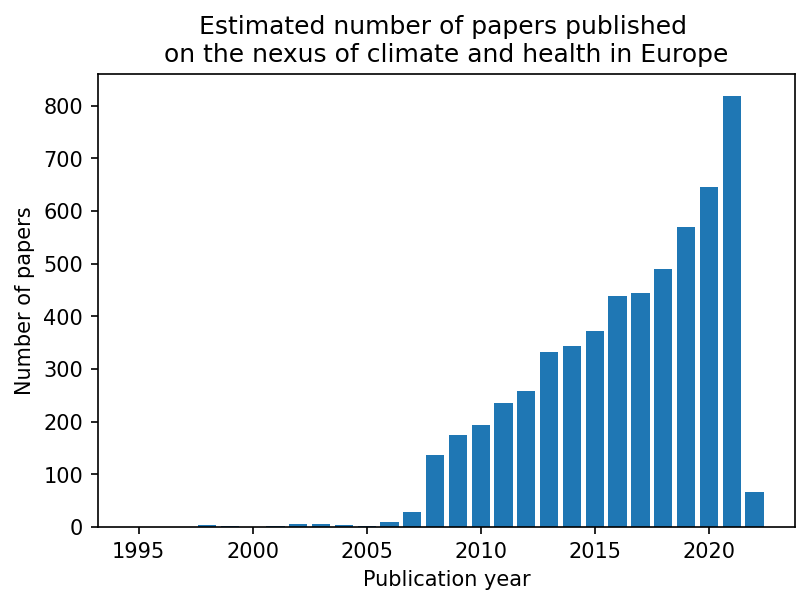

In [53]:
counts = df[df['id'].isin(
    dais[dais['alpha_3'].isin(eea_countries)]['doc_id']
)].groupby('PY')['id'].count()

print(counts)

fig, ax = plt.subplots(dpi=150)
ax.bar(counts.index, counts)

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')

def CAGR(first, last, periods):
    if periods > 0:
        return (last/first)**(1/periods)-1

counts = counts.to_frame("n")
counts['n-5'] = counts.shift(5)
counts['CAGR_5'] = counts.apply(lambda x: CAGR(x['n-5'],x['n'],5),axis=1)

for base_year in [1995,2000,2005]:
    counts[f'CAGR_{base_year}'] = counts.apply(lambda x: CAGR(counts[counts.index==base_year]['n'].values[0],x['n'],x.name-2000), axis=1)
counts.tail()

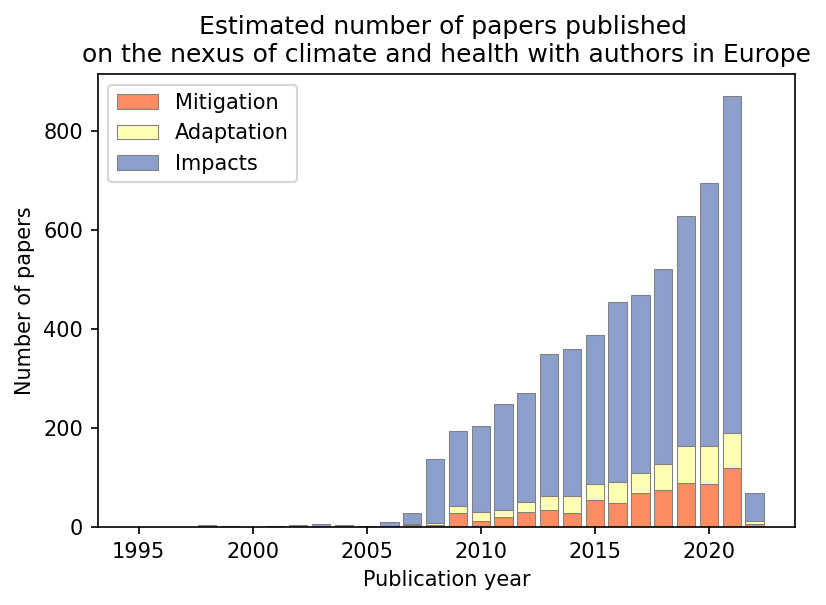

In [24]:
fig, ax = plt.subplots(dpi=150)
colors = ['#fc8d62','#ffffb3','#8da0cb']
all_counts = None
for i, c in enumerate(classes):
    counts = df[
        (df['id'].isin(dais[dais['alpha_3'].isin(eea_countries)]['doc_id'])) & 
        (df[f'{c} - prediction']>0.5)
    ].groupby('PY')['id'].count().to_frame(c)
    
    if all_counts is not None:
        all_counts = all_counts.merge(counts, left_index=True, right_index=True, how="outer").fillna(0)
        bottom = all_counts[[x for x in all_counts.columns if x!=c]].sum(axis=1)
    else:
        all_counts = counts
        bottom = None
    
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    

    ax.set_ylabel('Number of papers')
    ax.set_xlabel('Publication year')

    ax.set_title('Estimated number of papers published \non the nexus of climate and health with authors in Europe')
    
ax.legend()

In [25]:
dais[dais['alpha_3'].isin(eea_countries)].groupby('name')['doc_id'].

## Global

PY
1986.0       1
1987.0       1
1990.0       3
1991.0      21
1992.0      29
1993.0      31
1994.0      33
1995.0      61
1996.0      63
1997.0      64
1998.0      81
1999.0      88
2000.0      91
2001.0     102
2002.0     110
2003.0     100
2004.0     160
2005.0     179
2006.0     329
2007.0     343
2008.0     471
2009.0     556
2010.0     651
2011.0     762
2012.0     842
2013.0    1041
2014.0    1148
2015.0    1306
2016.0    1563
2017.0    1628
2018.0    1769
2019.0    2193
2020.0    2614
2021.0    3214
2022.0     263
Name: id, dtype: int64


,n,n-5,CAGR_5,CAGR_1995,CAGR_2000,CAGR_2005
PY,,,,,,
2018.0,1769,1041.0,0.111874,0.205714,0.179217,0.135719
2019.0,2193,1148.0,0.138202,0.207479,0.182325,0.140967
2020.0,2614,1306.0,0.148874,0.206699,0.182805,0.143464
2021.0,3214,1563.0,0.155094,0.207776,0.184989,0.147423
2022.0,263,1628.0,-0.305519,0.068677,0.049423,0.017643


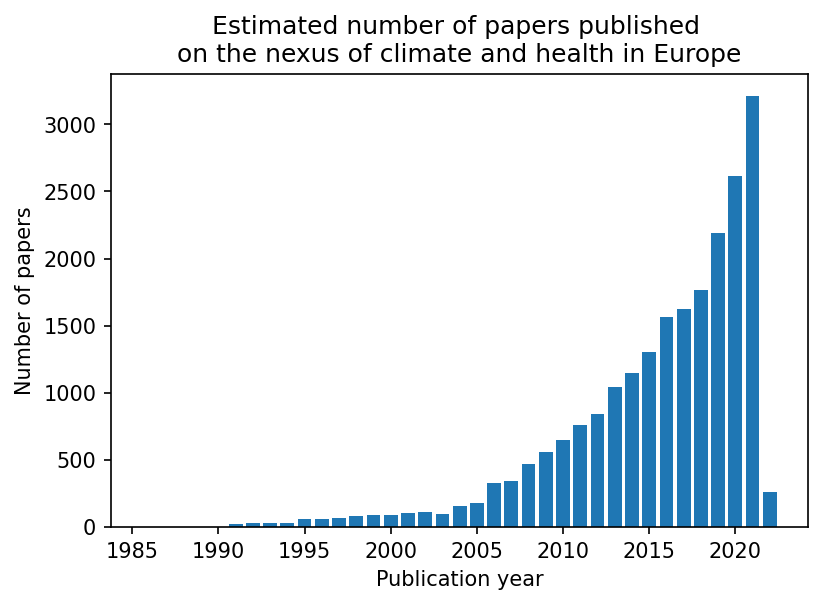

In [54]:
counts = df.groupby('PY')['id'].count()

print(counts)

fig, ax = plt.subplots(dpi=150)
ax.bar(counts.index, counts)

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')

def CAGR(first, last, periods):
    if periods > 0:
        return (last/first)**(1/periods)-1

counts = counts.to_frame("n")
counts['n-5'] = counts.shift(5)
counts['CAGR_5'] = counts.apply(lambda x: CAGR(x['n-5'],x['n'],5),axis=1)

for base_year in [1995,2000,2005]:
    counts[f'CAGR_{base_year}'] = counts.apply(lambda x: CAGR(counts[counts.index==base_year]['n'].values[0],x['n'],x.name-2000), axis=1)
counts.tail()

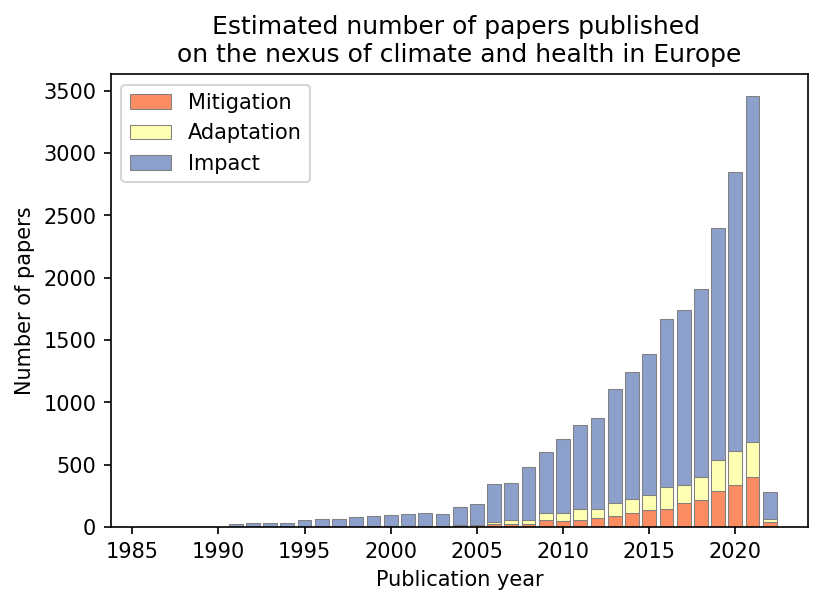

In [195]:
fig, ax = plt.subplots(dpi=150)
colors = ['#fc8d62','#ffffb3','#8da0cb']
all_counts = None
for i, c in enumerate(classes):
    counts = df[
        #(df['id'].isin(edf['doc_id'])) & 
        (df[f'{c} - prediction']>0.5)
    ].groupby('PY')['id'].count().to_frame(c)
    
    if all_counts is not None:
        all_counts = all_counts.merge(counts, left_index=True, right_index=True, how="outer").fillna(0)
        bottom = all_counts[[x for x in all_counts.columns if x!=c]].sum(axis=1)
    else:
        all_counts = counts
        bottom = None
    
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    

    ax.set_ylabel('Number of papers')
    ax.set_xlabel('Publication year')

    ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')
    
ax.legend()

In [201]:
place_counts = merged_df[merged_df['PY']==2021].groupby(['lat', 'lon'])['doc_id'].count().sort_values().reset_index()
place_counts.head()

M=5

bins = np.linspace(place_counts.doc_id.min(), place_counts.doc_id.max(), M)
bins = np.array([1,50,100,150,200])
#bins = np.array([1,10,20,30,40])
grouped = place_counts.groupby(np.digitize(place_counts.doc_id, bins))

,1 - Impact
PY,
2018.0,1515
2019.0,1864
2020.0,2243
2021.0,2778
2022.0,216


/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


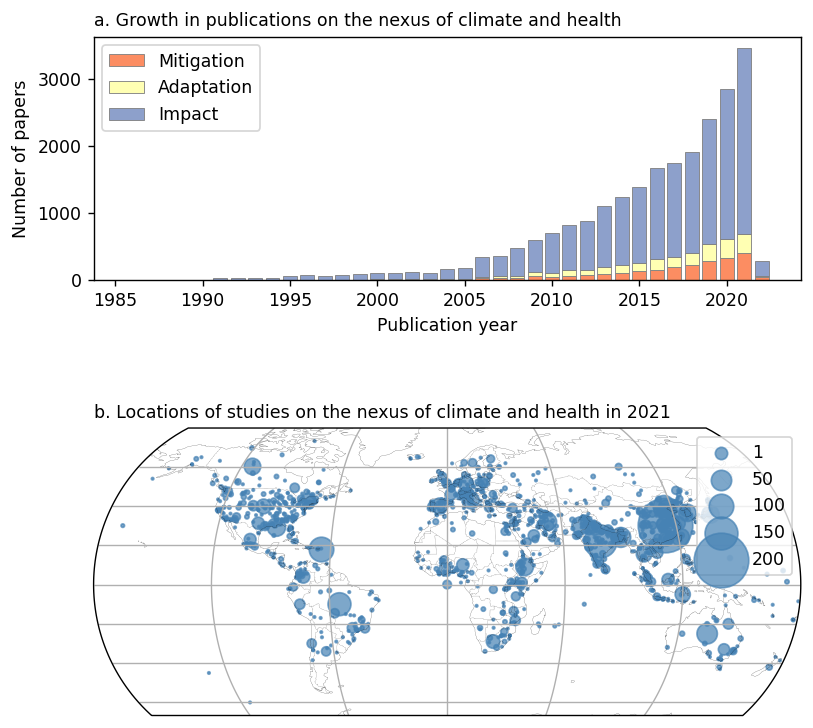

In [204]:
import matplotlib.gridspec as gridspec

tfs = 10

fig = plt.figure(dpi=125,figsize=(7.3,6.3))
gs = gridspec.GridSpec(2, 1, height_ratios=[.7, 1,], bottom=.05, top=.95, wspace=.2, hspace=.4)

ax = plt.subplot(gs[0,0])

bottom = 0
for i, c in enumerate(classes):
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    bottom += all_counts[c]   

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')  
ax.legend()

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('a. Growth in publications on the nexus of climate and health', loc="left", fontsize=tfs)

ax = plt.subplot(gs[1,0],projection=p)
#ax.set_extent([-22,45,32,70])
ax.gridlines()
ax.add_feature(cartopy.feature.BORDERS, lw=0.2, linestyle=':')
ax.coastlines(lw=0.1)

for i, (name, group) in enumerate(grouped):
    
    ax.scatter(
        group['lon'], group['lat'], 
        transform=ccrs.PlateCarree(), 
        s=group['doc_id']*2,
        label=bins[i],
        alpha=0.7,
        color="steelblue"
    )
    
ax.legend(loc="upper right")

ax.set_title('b. Locations of studies on the nexus of climate and health in 2021', loc="left", fontsize=tfs)


counts.tail()

In [205]:
shares = all_counts.copy()

for c in classes:
    shares[c] = shares[c] / all_counts.sum(axis=1)
    
shares.to_csv('data/global_shares.csv')
shares

,1 - Mitigation,1 - Adaptation,1 - Impact
PY,,,
1986.0,0.000000,0.000000,1.000000
1987.0,0.000000,0.000000,1.000000
1990.0,0.000000,0.000000,1.000000
1991.0,0.000000,0.045455,0.954545
1992.0,0.068966,0.000000,0.931034
1993.0,0.000000,0.000000,1.000000
1994.0,0.000000,0.000000,1.000000
1995.0,0.016667,0.000000,0.983333
1996.0,0.029851,0.029851,0.940299


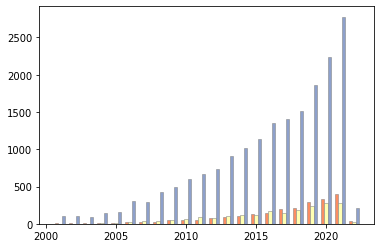

In [212]:
fig, ax = plt.subplots()

bottom = 0
for i, c in enumerate(classes):
    ax.bar(
        all_counts.query('index>2000').index+i*.25-.25, all_counts.query('index>2000')[c], label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5, width=0.25
    )